第10章アンケート分析を行うための自然言語処理10本ノック

ノック91
データを読み込み把握する

In [3]:
#データを読み込む

import pandas as pd
survey = pd.read_csv("survey.csv")

In [4]:
#データが読み込めたか確認する
#datetime:日付、comment:コメント、satisfaction:満足度
print(len(survey))
survey.head

86


<bound method NDFrame.head of      datetime                      comment  satisfaction
0   2019/3/11            駅前に若者が集まっている(AA駅)             1
1   2019/2/25             スポーツできる場所があるのが良い             5
2   2019/2/18                    子育て支援が嬉しい             5
3    2019/4/9              保育園に入れる（待機児童なし）             4
4    2019/1/6                    駅前商店街が寂しい             2
..        ...                          ...           ...
81  2019/1/21            小学校の校庭が芝生なのでとても良い             5
82  2019/4/30  ホームページからアンケートを投稿できるようにしてほしい             2
83   2019/1/9                公園に遊び道具が少なすぎる             1
84   2019/3/9                もっと公園を増やしてほしい             2
85   2019/4/2                駅前に駐車場が少ない、不便             1

[86 rows x 3 columns]>

In [5]:
#欠損値の確認
#コメントに2件の欠損値があることが確認できる
#欠損値が多すぎると、有益な分析ができず、使えないデータとなってしまう。
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

スライドで欠損値について説明する

In [6]:
#欠損値の消去
survey = survey.dropna()

#欠損値を消去できたかを確認する
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

ノック92
不要な文字の除去

言語は、人によって書き方が様々である。
不要な文字を除外する必要がある。
今回は、特定の文字を除外する方法や正規表現の活用に挑戦しよう。

In [7]:
#survey1行目「AA」を除外してみる
#replace:特定の文字列を置換する
survey["comment"] = survey["comment"].str.replace("AA", "")
survey["comment"].head()

C:\Users\yhira\AppData\Local\Temp\ipykernel_27612\2769474521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["comment"] = survey["comment"].str.replace("AA", "")


0     駅前に若者が集まっている(駅)
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3     保育園に入れる（待機児童なし）
4           駅前商店街が寂しい
Name: comment, dtype: object

())内が補足的な内容な場合、()ごと消去することが多い
一定のルールで除去する場合は、正規表現を用いると良い
正規表現：文字などのパターンを表現することができる
これを用いて()内の一定ルールのパターンを検索し、置換することができる

In [8]:
#regexにTrueを指定すると、正規表現によるパターンマッチが可能になる。
#マッチした文字列を消去する
#\：括弧開き、(\)：括弧閉じ
#.+?：1文字以上の最短(1文字以上の何かしらが入ってますよっていう意味？)

#半角括弧の文字列消去
#surveyのcomment列における、文字データの()内のデータを()ごと消去する
survey["comment"] = survey["comment"].str.replace("\(.+?\)","", regex = True)
survey.head()

C:\Users\yhira\AppData\Local\Temp\ipykernel_27612\3456885487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["comment"] = survey["comment"].str.replace("\(.+?\)","", regex = True)


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


スライドで正規化について説明する

In [9]:
#全角括弧の文字列消去
survey["comment"] = survey["comment"].str.replace("\（.+?\）","", regex = True)
survey.head()

C:\Users\yhira\AppData\Local\Temp\ipykernel_27612\3880245768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["comment"] = survey["comment"].str.replace("\（.+?\）","", regex = True)


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


ノック93
文字列をカウントしヒストグラムを表示する

データの把握をする上で、アンケート1つの長さがどれくらいなのかを頭に入れつつ進めていく。

In [10]:
#comment列の文字の長さの計算
#length:commentの長さ　を追加する
survey["length"] = survey["comment"].str.len()
survey.head()

C:\Users\yhira\AppData\Local\Temp\ipykernel_27612\1349055393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey["length"] = survey["comment"].str.len()


,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <BarContainer object of 10 artists>)

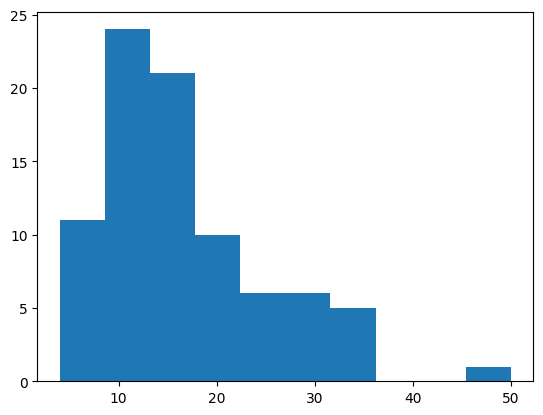

In [11]:
#ヒストグラムの描画
#matplotlib.pyplot：グラフを作れるモジュール
#%matplotlib inline：グラフがアウトプット行に出力される、plt.show()省略可、plt.show()で2つ以上のグラフ表示可能
#参考(https://www.yutaka-note.com/entry/matplotlib_inline)
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["length"])

ノック94
形態素解析で文章を分割する

形態素解析：文章を単語に分割する技術。有名なモジュールはMeCabやJanomeなど。
今回はMecabで進めていく。

In [12]:
import MeCab

なぜかMeCabが使えないので(pip listにはいる)、他の方法で形態素解析していく。
私が調べつつ考えつつ書いているだけなので、もっと効率的な方法があると思います。

In [13]:
#参考(https://dev.classmethod.jp/articles/try-parsing-using-ginza/)
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('すもももももももものうち')
for sent in doc.sents:
    for token in sent:
        print(
            token.i,
            token.orth_,
            token.lemma_,
            token.norm_,
            token.morph.get("Reading"),
            token.pos_,
            token.morph.get("Inflection"),
            token.tag_,
            token.dep_,
            token.head.i,
        )
    print('EOS')

OSError: [E050] Can't find model 'ja_ginza'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
#単語のリストを作る
words_arr = []
for token in sent:
    words_arr.append(token.orth_)

words_arr

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

ノック95
形態素解析で文章から「動詞・名詞」を抽出する

In [ ]:
#品詞のリストを作る
words_class = []
for token in sent:
    words_class.append(token.tag_)

print(words_arr)
print(words_class)

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']
['名詞-普通名詞-一般', '助詞-係助詞', '名詞-普通名詞-一般', '助詞-係助詞', '名詞-普通名詞-一般', '助詞-格助詞', '名詞-普通名詞-副詞可能']


In [ ]:
#名詞と動詞のリストを作る
words_vn = []
for i in range(len(words_arr)):
    a = words_class[i]
    if "名詞" in a:
        words_vn.append(words_arr[i])

words_vn

['すもも', 'もも', 'もも', 'うち']

ノック96
形態素解析で抽出した頻出する名詞を確認しよう

In [ ]:
#リスト化用に()消去したやつをcsvで保存する
#surveyでやろうとしたら、seriesではfor文を回せないと言われたから(?)
#参考(https://work-life-enj.com/pyhon-write-csv/#No3)
survey.to_csv("output_survey.csv", encoding="shift_jis")

In [ ]:
#list版surveyの準備
#参考(https://kaworu.jpn.org/kaworu/2018-06-02-1.php)
survey_list = pd.read_csv("output_survey.csv",encoding="shift_jis").values.tolist()

#コメントだけのリスト作り
all_comment = []
for i in range(len(survey)):
    all_comment.append(survey_list[i][2])

all_comment

['駅前に若者が集まっている',
 'スポーツできる場所があるのが良い',
 '子育て支援が嬉しい',
 '保育園に入れる',
 '駅前商店街が寂しい',
 '生活は便利だけど遊ぶ場所がない',
 '遊ぶ場所がない',
 '商業施設が出来て欲しい',
 '病院が充実している',
 'サイクリングコースが良い',
 'お祭りをもっと盛り上げて欲しい',
 '小学校が綺麗で嬉しい',
 '公園がもっと欲しい',
 '近くに公園があって住みやすい',
 'スーパーまで行くのが大変',
 '子育てしやすい',
 'デートスポットが欲しい',
 'もっと商店街を盛り上げてほしい',
 '夜道が暗い',
 'ゴミ処理が楽',
 '映画館が欲しい',
 'もっと街路樹が欲しい',
 'もう少し公園を追加して欲しい',
 '観光スポットがない',
 '子育てがしやすい',
 '道が綺麗',
 '都内へのアクセスが良い',
 '家賃がリーズナブル',
 'BBBの渋滞をなんとかして欲しい',
 '商店街に屋根がないから雨が降ると大変',
 '商店街にもっとたくさん喫茶店が欲しい',
 'スポーツジムがあってよく利用している',
 'スポーツジムの利用料金が高い',
 '働くママの支援をもっと増やして欲しい',
 'バスがあまりこない',
 '自転車で走りやすい',
 'ランニングとか運動できる場所が多い',
 '有名な企業が多い',
 '駅前に駐車場が足りない',
 '変なおじさんに声を掛けられた事がある。警察の巡回をもっと強化してほしい',
 '消防団が活発で安心できる',
 '災害時の避難場所が少ない気がする。',
 '最近川の氾濫被害が大きく取り扱われているが、この町ではどのような氾濫防止を取っているか説明してほしい',
 '信号のない交差点がｘｘｘにあり事故が起きそうで怖い、信号を付けて欲しい。',
 '商店街の活性化活動をもっと行政が後押ししてほしい',
 '子どもが安全に遊ぶ場所がない',
 '駅前に駐輪場が無いので不便',
 '街路樹の落ち葉の掃除が大変、街路樹をやめてほしい',
 '災害時の備蓄状況はどうなっているか',
 '歩道が広い道が多くて安心できる',
 '地域の自治体をもっと支援してほしい',
 '自治体の活動が頻繁で安心して暮らせる',
 '観光地が少ない

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')
for i in range(len(survey)):
    doc = nlp(all_comment[i])
    for sent in doc.sents:
        for token in sent:
            print(
                token.i,
                token.orth_,
                token.lemma_,
                token.norm_,
                token.morph.get("Reading"),
                token.pos_,
                token.morph.get("Inflection"),
                token.tag_,
                token.dep_,
                token.head.i,
            )
        print('EOS')

0 駅前 駅前 駅前 ['エキマエ'] NOUN [] 名詞-普通名詞-一般 obl 4
1 に に に ['ニ'] ADP [] 助詞-格助詞 case 0
2 若者 若者 若者 ['ワカモノ'] NOUN [] 名詞-普通名詞-一般 nsubj 4
3 が が が ['ガ'] ADP [] 助詞-格助詞 case 2
4 集まっ 集まる 集まる ['アツマッ'] VERB ['五段-ラ行;連用形-促音便'] 動詞-一般 ROOT 4
5 て て て ['テ'] SCONJ [] 助詞-接続助詞 mark 4
6 いる いる 居る ['イル'] VERB ['上一段-ア行;終止形-一般'] 動詞-非自立可能 fixed 5
EOS
0 スポーツ スポーツ スポーツ ['スポーツ'] VERB [] 名詞-普通名詞-サ変可能 acl 2
1 できる できる 出来る ['デキル'] AUX ['上一段-カ行;連体形-一般'] 動詞-非自立可能 aux 0
2 場所 場所 場所 ['バショ'] NOUN [] 名詞-普通名詞-一般 nsubj 4
3 が が が ['ガ'] ADP [] 助詞-格助詞 case 2
4 ある ある 有る ['アル'] VERB ['五段-ラ行;連体形-一般'] 動詞-非自立可能 csubj 7
5 の の の ['ノ'] SCONJ [] 助詞-準体助詞 mark 4
6 が が が ['ガ'] ADP [] 助詞-格助詞 case 4
7 良い 良い 良い ['ヨイ'] ADJ ['形容詞;終止形-一般'] 形容詞-非自立可能 ROOT 7
EOS
0 子育て 子育て 子育て ['コソダテ'] NOUN [] 名詞-普通名詞-サ変可能 compound 1
1 支援 支援 支援 ['シエン'] NOUN [] 名詞-普通名詞-サ変可能 nsubj 3
2 が が が ['ガ'] ADP [] 助詞-格助詞 case 1
3 嬉しい 嬉しい 嬉しい ['ウレシイ'] ADJ ['形容詞;終止形-一般'] 形容詞-一般 ROOT 3
EOS
0 保育園 保育園 保育園 ['ホイクエン'] NOUN [] 名詞-普通名詞-一般 obl 2
1 に に に ['ニ'] ADP [] 助詞-格助詞 case 0
2 入れる 入れる 入れる ['

In [ ]:
#単語のリストを作る
all_arr = []
for i in range(len(survey)):
    doc = nlp(all_comment[i])
    for sent in doc.sents:
        for token in sent:
            all_arr.append(token.orth_)
all_arr

['駅前',
 'に',
 '若者',
 'が',
 '集まっ',
 'て',
 'いる',
 'スポーツ',
 'できる',
 '場所',
 'が',
 'ある',
 'の',
 'が',
 '良い',
 '子育て',
 '支援',
 'が',
 '嬉しい',
 '保育園',
 'に',
 '入れる',
 '駅前',
 '商店街',
 'が',
 '寂しい',
 '生活',
 'は',
 '便利',
 'だ',
 'けど',
 '遊ぶ',
 '場所',
 'が',
 'ない',
 '遊ぶ',
 '場所',
 'が',
 'ない',
 '商業',
 '施設',
 'が',
 '出来',
 'て',
 '欲しい',
 '病院',
 'が',
 '充実',
 'し',
 'て',
 'いる',
 'サイクリングコース',
 'が',
 '良い',
 'お祭り',
 'を',
 'もっと',
 '盛り上げ',
 'て',
 '欲しい',
 '小学校',
 'が',
 '綺麗',
 'で',
 '嬉しい',
 '公園',
 'が',
 'もっと',
 '欲しい',
 '近く',
 'に',
 '公園',
 'が',
 'あっ',
 'て',
 '住み',
 'やすい',
 'スーパー',
 'まで',
 '行く',
 'の',
 'が',
 '大変',
 '子育て',
 'し',
 'やすい',
 'デート',
 'スポット',
 'が',
 '欲しい',
 'もっと',
 '商店街',
 'を',
 '盛り上げ',
 'て',
 'ほしい',
 '夜道',
 'が',
 '暗い',
 'ゴミ',
 '処理',
 'が',
 '楽',
 '映画館',
 'が',
 '欲しい',
 'もっと',
 '街路樹',
 'が',
 '欲しい',
 'もう',
 '少し',
 '公園',
 'を',
 '追加',
 'し',
 'て',
 '欲しい',
 '観光',
 'スポット',
 'が',
 'ない',
 '子育て',
 'が',
 'し',
 'やすい',
 '道',
 'が',
 '綺麗',
 '都内',
 'へ',
 'の',
 'アクセス',
 'が',
 '良い',
 '家賃',
 'が',
 'リーズナブル',
 'BBB',
 'の',
 '渋滞',
 'を',


In [ ]:
all_class = []
for i in range(len(survey)):
    doc = nlp(all_comment[i])
    for sent in doc.sents:
        for token in sent:
            all_class.append(token.tag_)
all_class

['名詞-普通名詞-一般',
 '助詞-格助詞',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '動詞-一般',
 '助詞-接続助詞',
 '動詞-非自立可能',
 '名詞-普通名詞-サ変可能',
 '動詞-非自立可能',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '動詞-非自立可能',
 '助詞-準体助詞',
 '助詞-格助詞',
 '形容詞-非自立可能',
 '名詞-普通名詞-サ変可能',
 '名詞-普通名詞-サ変可能',
 '助詞-格助詞',
 '形容詞-一般',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '動詞-一般',
 '名詞-普通名詞-一般',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '形容詞-一般',
 '名詞-普通名詞-サ変可能',
 '助詞-係助詞',
 '名詞-普通名詞-形状詞可能',
 '助動詞',
 '助詞-接続助詞',
 '動詞-一般',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '形容詞-非自立可能',
 '動詞-一般',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '形容詞-非自立可能',
 '名詞-普通名詞-一般',
 '名詞-普通名詞-サ変可能',
 '助詞-格助詞',
 '動詞-非自立可能',
 '助詞-接続助詞',
 '形容詞-非自立可能',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '名詞-普通名詞-サ変可能',
 '動詞-非自立可能',
 '助詞-接続助詞',
 '動詞-非自立可能',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '形容詞-非自立可能',
 '名詞-普通名詞-サ変可能',
 '助詞-格助詞',
 '副詞',
 '動詞-一般',
 '助詞-接続助詞',
 '形容詞-非自立可能',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '形状詞-一般',
 '助動詞',
 '形容詞-一般',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '副詞',
 '形容詞-非自立可能',
 '名詞-普通名詞-副詞可能',
 '助詞-格助詞',
 '名詞-普通名詞-一般',
 '助詞-格助詞',
 '動詞-非自立可能',
 '助詞-接続助詞',
 '動詞-一般',
 '接尾辞-形容詞的',
 '名詞-普通名詞-一般',
 '助

In [ ]:
all_noun = []
for i in range(len(survey)):
    x =
    print(x)
    if "名詞" in x:
        all_noun.append(all_arr[i])

all_noun

名詞-普通名詞-一般
助詞-格助詞
名詞-普通名詞-一般
助詞-格助詞
動詞-一般
助詞-接続助詞
動詞-非自立可能
名詞-普通名詞-サ変可能
動詞-非自立可能
名詞-普通名詞-一般
助詞-格助詞
動詞-非自立可能
助詞-準体助詞
助詞-格助詞
形容詞-非自立可能
名詞-普通名詞-サ変可能
名詞-普通名詞-サ変可能
助詞-格助詞
形容詞-一般
名詞-普通名詞-一般
助詞-格助詞
動詞-一般
名詞-普通名詞-一般
名詞-普通名詞-一般
助詞-格助詞
形容詞-一般
名詞-普通名詞-サ変可能
助詞-係助詞
名詞-普通名詞-形状詞可能
助動詞
助詞-接続助詞
動詞-一般
名詞-普通名詞-一般
助詞-格助詞
形容詞-非自立可能
動詞-一般
名詞-普通名詞-一般
助詞-格助詞
形容詞-非自立可能
名詞-普通名詞-一般
名詞-普通名詞-サ変可能
助詞-格助詞
動詞-非自立可能
助詞-接続助詞
形容詞-非自立可能
名詞-普通名詞-一般
助詞-格助詞
名詞-普通名詞-サ変可能
動詞-非自立可能
助詞-接続助詞
動詞-非自立可能
名詞-普通名詞-一般
助詞-格助詞
形容詞-非自立可能
名詞-普通名詞-サ変可能
助詞-格助詞
副詞
動詞-一般
助詞-接続助詞
形容詞-非自立可能
名詞-普通名詞-一般
助詞-格助詞
形状詞-一般
助動詞
形容詞-一般
名詞-普通名詞-一般
助詞-格助詞
副詞
形容詞-非自立可能
名詞-普通名詞-副詞可能
助詞-格助詞
名詞-普通名詞-一般
助詞-格助詞
動詞-非自立可能
助詞-接続助詞
動詞-一般
接尾辞-形容詞的
名詞-普通名詞-一般
助詞-副助詞
動詞-非自立可能
助詞-準体助詞
助詞-格助詞
形状詞-一般
名詞-普通名詞-サ変可能


['駅前',
 '若者',
 'スポーツ',
 '場所',
 '子育て',
 '支援',
 '保育園',
 '駅前',
 '商店街',
 '生活',
 '便利',
 '場所',
 '場所',
 '商業',
 '施設',
 '病院',
 '充実',
 'サイクリングコース',
 'お祭り',
 '小学校',
 '公園',
 '近く',
 '公園',
 'スーパー',
 '子育て']